In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
from scipy.special import factorial

def poisson_pmf(x, l):
    # x es un valor entero, o una lista de valores enteros
    # l parámetro de la distribución (lambda)
    x = np.array(x)
    return np.exp(-l)*l**(x) / factorial(x)

def poisson_cdf(x, l):
    # x es un valor entero, P(X<=x)
    # l parámetro de la distribución, lambda
    x = np.array(range(0, x+1))
    return poisson_pmf(x, l).sum()

# Parámetro de la distribución de poisson lambda
l = 10

x = np.arange(16)  # valores x={0,1,...,15}

print("Evaluando la PMF:", 1 - poisson_pmf(x, l).sum())
print("Evaluando la CDF:", 1 - poisson_cdf(15, l))

Evaluando la PMF: 0.04874040330397866
Evaluando la CDF: 0.04874040330397866


In [4]:
from scipy.stats import poisson

# Parámetro de la distribución de poisson lambda
l = 10

x = np.arange(16)  # valores x={0,1,...,15}

print("Evaluando la PMF:", 1 - poisson.pmf(x, l).sum())
print("Evaluando la CDF:", 1 - poisson.cdf(15, l))

Evaluando la PMF: 0.048740403303976554
Evaluando la CDF: 0.04874040330397866


NameError: name 'plot_cdf' is not defined

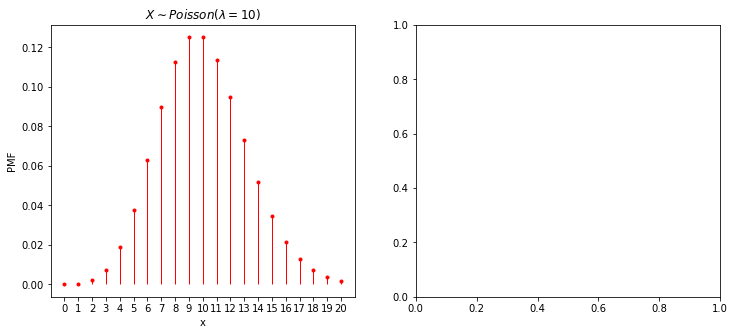

In [8]:
# Parámetro de la distribución de poisson, lambda
l = 10

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))  # Dos paneles ax1 y ax2

x_upper = 20

# Panel 1: ax1
x = np.arange(x_upper+1)  # evaluaremos un subconjunto de los valores posibles de la v.a. x={0,...,15} 
pmfx = poisson.pmf(x, l)  # Evalúa la PMF, 𝑓𝑋(𝑥;𝑛,𝑝) definida arriba
ax1.vlines(x, [0]*len(x), pmfx, color="r", lw=1)  # grafica las líneas verticales
ax1.plot(x, pmfx, '.', color='r')  # grafica los puntos
ax1.set_xlabel("x"); ax1.set_ylabel("PMF")  # etiqueta de los ejes
ax1.set_title(r"$X \sim Poisson(\lambda=$"+ str(l) +")")  # título del panel
ax1.set_xticks(range(0, x_upper+1, 1))  # define xticks
ax1.set_xticklabels(range(0, x_upper+1, 1))  # define etiquetas de xticks

# Panel 2: ax2
xcdf = np.array(range(-1,x_upper+2))
Fx = poisson.cdf(x, l)
plot_cdf(xcdf, Fx, ax=ax2)
ax2.set_title("CDF")  # título del panel
ax2.set_xlabel("x"); ax2.set_ylabel("CDF")  # etiqueta de los ejes
ax2.set_xticks(range(0, x_upper+1, 1))  # define xticks
xt = ax2.set_xticklabels(range(0, x_upper+1, 1))  # define etiquetas de xticks

print("Media:", l)
print("Varianza:", l)

Media de la muestra: 10.45
Varianza de la muestra: 9.287500000000001
Media poblacional: 10
Varianza poblacional: 10
P(X>15) = 0.06


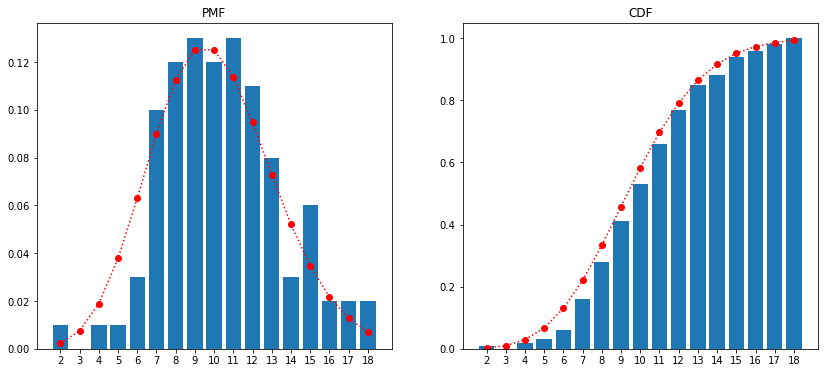

In [6]:
np.random.seed(12345)  # semilla aleatoria, queremos replicabilidad

l = 10  # parámetro lambda
n = 100  # tamaño de muestra

# distribución.rvs(paramétros, size)
# genera un vector aleatorio a partir de la distribución y parámetros dados
# size: tamaño del vector devuelto
muestra = poisson.rvs(l, size=n)

plt.figure(figsize=(14,6))  # tamaño de la figura

plt.subplot(1,2,1)  # panel 1
# Diagrama de barras
# x: valores únicos en la muestra
# fx: frecuencia de cada valor único x
# fx/fx.sum(): frecuencias relativas
x, fx = np.unique(muestra, return_counts=True)
plt.bar(x, fx/fx.sum())

#Vamos a graficar la distribución teórica (curva PMF en rojo) 
#para los valores observados (barras azules) 
#en la muestra: entre min(x) y max(x)
x_t = np.arange(x.min(), x.max()+1)
plt.plot(x_t, poisson.pmf(x_t, l), ':or')
plt.title("PMF")
plt.xticks(x_t)

plt.subplot(1,2,2)  # panel 2
# x: valores únicos en la muestra
# fx: frecuencia de cada valor único x
# fx/fx.sum(): frecuencias relativas
# (fx/fx.sum()).cumsum(): frecuencias relativas acumuladas
plt.bar(x, (fx/fx.sum()).cumsum())

#Vamos a graficar la distribución acumulada teórica (curva CDF en rojo) 
#para los valores observados (barras azules) 
#en la muestra: entre min(x) y max(x)
plt.plot(x_t, poisson.cdf(x_t, l), ':or')
plt.title("CDF")
t=plt.xticks(x_t)

print("Media de la muestra:", muestra.mean())
print("Varianza de la muestra:", muestra.var())

print("Media poblacional:", l)  # lambda
print("Varianza poblacional:", l)  # lambda

# Podemos responder para nuestra muestra la pregunta P(X>15)
# número de observaciones favorables: len(np.where(muestra > 15)[0])
# total de observaciones, tamaño de muestra: len(muestra), es igual a n
print("P(X>15) =", len(np.where(muestra > 15)[0]) / len(muestra))

In [7]:
muestra

array([16,  7, 11, 18, 12,  8, 18, 11, 10,  9, 13, 15, 10, 11, 13, 13,  7,
       10, 12, 10, 11, 10,  9, 11,  6, 13, 15,  8, 10, 17,  7,  9,  7, 11,
        8, 15,  7, 11,  6, 11, 12, 15, 11, 12, 16,  4,  9,  5, 10, 12, 12,
       13,  8,  9,  8,  9, 14,  8, 10,  9, 11,  9, 15, 12, 17, 10,  6, 13,
        8,  7, 14,  9,  9, 10, 12, 14, 11, 10,  7,  9,  8,  7, 12, 12,  8,
        7,  2,  7,  8, 11,  8, 15,  8, 10,  9, 11, 13, 13, 12,  9])